# Classification des images avec un réseau pré-entraîné à l'aide de TensorFlow Hub

TensorFlow Hub (TFHub) est un référentiel de centaines de modèles d'apprentissage automatique auxquels contribue la grande et riche communauté qui entoure TensorFlow. Ici, nous pouvons trouver des modèles pour une myriade de tâches différentes, non seulement pour la vision par ordinateur mais pour des applications dans de nombreux domaines diérents, tels que le traitement du langage naturel (NLP) et l'apprentissage par renforcement. Dans cette recette, nous utiliserons un modèle formé sur ImageNet, hébergé sur TFHub, pour faire des prédictions sur une image personnalisée. Commençons!

**1.** Importez les packages requis. Ceux-ci incluent le réseau pré-entraîné utilisé pour la classification, ainsi que certaines fonctions d'assistance pour pré-traiter les images :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import get_file

**2.** Dénissez l'URL du classificateur ResNetV2152 pré-entraîné dans TFHub :

In [2]:
classifier_url = ('https://tfhub.dev/google/imagenet/'
                  'resnet_v2_152/classification/4')

3. Téléchargez et instanciez le classificateur hébergé sur TFHub :

In [3]:
model = Sequential([
    hub.KerasLayer(classifier_url, input_shape=(224, 224, 3))
])

4. Chargez l'image que nous allons classer, convertissez-la en tableau numpy, normalisez-la et encapsulez-la dans un lot singleton :

In [5]:
#https://github.com/bilal-rachik/Computer-Vision/raw/main/Image%20Classifcation/Images/beetle.jpg

image = load_img('/content/beetle.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

**5.** Utilisez le modèle pré-entraîné pour classer l'image :

In [6]:
predictions = model.predict(image)

**6.** Extraire l'indice de la prédiction la plus probable :

In [7]:
predicted_index = np.argmax(predictions[0], axis=-1)

**7.** Téléchargez les étiquettes ImageNet dans un fichier nommé ImageNetLabels.txt :

In [8]:
file_name = 'ImageNetLabels.txt'
file_url = ('https://storage.googleapis.com/'
            'download.tensorflow.org/data/ImageNetLabels.txt')
labels_path = get_file(file_name, file_url)

with open(labels_path) as f:
    imagenet_labels = np.array(f.read().splitlines())

24576/10484 [======================================================================] - 0s 0us/step


**8.** Extraire le nom de la classe correspondant à l'indice de la prédiction la plus probable :

In [9]:
predicted_class = imagenet_labels[predicted_index]
print(predicted_class)

convertible


**10.** Tracez l'image d'origine avec son étiquette la plus probable :

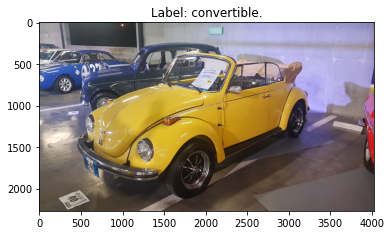

In [10]:
plt.figure()
plt.title(f'Label: {predicted_class}.')
original = load_img('beetle.jpg')
original = img_to_array(original)
plt.imshow(original / 255.0)
plt.show()

Après avoir importé les packages pertinents, nous avons défini l'URL du modèle que nous voulions utiliser pour classer notre image d'entrée. Pour télécharger et convertir un tel réseau en un modèle Keras, nous avons utilisé la classe hub.KerasLayer à l'étape 3. Ensuite, à l'étape 4, nous avons chargé l'image que nous voulions classer en mémoire, en nous assurant que ses dimensions correspondent à celles du le réseau attend : 224x224x3.

Les étapes 5 et 6 effectuent la classification et extraient respectivement la catégorie la plus probable. Cependant, pour rendre cette prédiction lisible pour nous, nous avons téléchargé un fichier en texte brut avec toutes les étiquettes ImageNet à l'étape 7, que nous avons ensuite analysées à l'aide de numpy, nous permettant d'utiliser l'index de la catégorie la plus probable pour obtenir l'étiquette correspondante, affiché à l'étape 10 avec l'image d'entrée